In [10]:
import os
import pandas as pd
from ast import literal_eval 


In [1]:
def read_log_dict(log_path):
    result_dict_list = []
    
    reg = '**********START:'#(\d{2}\/){2}\d{4} \d{2}(:\d{2}){2}**********'
    with open(log_path,'r') as f:
        logg = f.readlines()

    for lnum, l in reversed(list(enumerate(logg))):
        if reg in l and lnum < len(logg):

            for i in range(lnum+1, len(logg)):
                if logg[i].strip():
                    result_dict = literal_eval(logg[i].strip().strip(','))
                    result_dict_list.append(result_dict)

            break
            
    return result_dict_list
    
def get_pred(result_dict_list, metric='prc'):
    ratio = []
    seed = []
    prc = []
    for r in result_dict_list:
#         print(r)
        ratio.append(r['ratio'])
        seed.append(r['seed'])
        prc.append(r[metric])
    return ratio, seed, prc

def get_seed_result(seed_dir, log_filename, metric='prc'):
    
    ratio = []
    seed = []
    prc = []
    
    result_dict_list = read_log_dict(os.path.join(seed_dir, log_filename))
    r, s, p = get_pred(result_dict_list, metric)
    ratio += r; seed += s; prc += p

    df_dict = pd.DataFrame({'ratio':ratio, 'seed':seed, 'prc':prc})
    
    prc_df = group_seed(df_dict)
    
    return prc_df

def group_seed(prc_df):
    prc_df_ = prc_df.loc[prc_df['seed']==0, ['ratio','prc']]
    prc_df_ = prc_df_.rename(columns={'prc':'prc0'})

    for i in range(1, 6):
        prc_df_[f'prc{i}'] = prc_df.loc[prc_df['seed']==i, ['prc']].reset_index(drop=True)
    
    return prc_df_



In [42]:
dfs = []
for model in ['single','dense','tree']:
    prc_df = get_seed_result('/home/yhyeung2/CoV_Encoder_HA/src/log/experiment1/', model+'.log')
    prc_df['model'] = pd.Series([model]*prc_df.shape[0])
    dfs.append(prc_df)
df = pd.concat(dfs)
df.to_csv('/home/yhyeung2/CoV_Encoder_HA/src/log/experiment1/logs.csv',index=False)
df

,ratio,prc0,prc1,prc2,prc3,prc4,prc5,model
0,1.0,0.287812,0.339248,0.333333,0.349419,0.285163,0.333333,single
1,4.0,0.497154,0.545102,0.652114,0.606732,0.551556,0.657208,single
2,7.0,0.766337,0.661222,0.772602,0.711008,0.784271,0.742585,single
3,10.0,0.817170,0.734921,0.777576,0.717736,0.778026,0.765048,single
4,13.0,0.807479,0.819806,0.815683,0.800542,0.817456,0.808400,single
5,16.0,0.868322,0.904244,0.882418,0.852880,0.860956,0.915734,single
6,19.0,0.851098,0.917222,0.866761,0.860427,0.887929,0.829226,single
7,22.0,0.868265,0.919344,0.899250,0.858319,0.859451,0.872823,single
8,25.0,0.931221,0.905615,0.890989,0.902096,0.936399,0.846442,single
9,28.0,0.914562,0.939215,0.882678,0.906307,0.909496,0.914562,single


In [43]:
dfs = []
for model in ['single','dense','tree']:
    prc_df = get_seed_result('/home/yhyeung2/CoV_Encoder_HA/src/log/experiment2/', model+'.log')
    prc_df['model'] = pd.Series([model]*prc_df.shape[0])
    dfs.append(prc_df)
df = pd.concat(dfs)
df.to_csv('/home/yhyeung2/CoV_Encoder_HA/src/log/experiment2/logs.csv',index=False)
df

,ratio,prc0,prc1,prc2,prc3,prc4,prc5,model
0,1.0,0.364364,0.319769,0.360515,0.366460,0.379024,0.357594,single
1,2.0,0.486116,0.427958,0.495452,0.481718,0.485427,0.454048,single
2,3.0,0.517999,0.589342,0.534927,0.506586,0.590982,0.532779,single
3,4.0,0.592955,0.591026,0.595349,0.604404,0.598069,0.589673,single
4,5.0,0.643766,0.692944,0.666012,0.659613,0.643766,0.579496,single
5,6.0,0.651169,0.785403,0.644684,0.648680,0.675663,0.679831,single
6,7.0,0.706087,0.712675,0.730529,0.746426,0.689594,0.758478,single
7,8.0,0.754699,0.785035,0.773036,0.730355,0.767531,0.745777,single
8,9.0,0.768002,0.790036,0.743933,0.727809,0.781558,0.753029,single
9,10.0,0.772510,0.768534,0.759571,0.757739,0.782616,0.740404,single


# plotting

In [14]:
import matplotlib.pyplot as plt


In [12]:
def get_results(csv, model, desired_cols):
    
    sheet = pd.read_csv(csv)
    target_ = sheet.loc[sheet['model']==model, desired_cols]
    return target_

def plot_csv_(result_file, metric, xlabel):
    
    model = ['dense', 'single', 'tree']
    seq_type = 'HL'

    r = pd.read_csv(result_file)
    desired_cols = ['model','ratio']
    
    PRC = [c for c in r.columns if metric in c]
    desired_cols.extend(PRC)

    for m in model:

        r = get_results(result_file, m, desired_cols)
        rratio = r['ratio'].sort_values()
        
        plt.plot(rratio, r[PRC].mean(axis=1), '-o', label=m.replace('single','transformer'))
        plt.xlabel(xlabel)
        plt.ylabel('PR-AUC')
        plt.ylim([0, 1])
        plt.legend()
        
    plt.show()


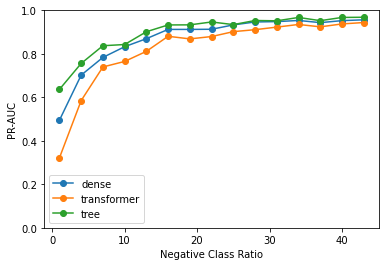

In [17]:
plot_csv_('/home/yhyeung2/CoV_Encoder_HA/src/log/experiment1/logs.csv', metric='prc', xlabel='Negative Class Ratio')

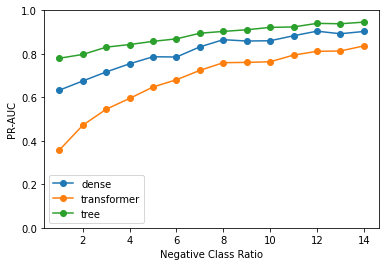

In [18]:
plot_csv_('/home/yhyeung2/CoV_Encoder_HA/src/log/experiment2/logs.csv', metric='prc', xlabel='Negative Class Ratio')